In [1]:
import yt
import unyt

# import caesar
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import binned_statistic

import os
# import XIGrM.gas_properties as g_p
# from XIGrM.gas_properties import m_p, k_B, default_elements
# import XIGrM.X_properties as x_p
# import XIGrM.halo_analysis as h_a
# import XIGrM.prepare_pyatomdb as ppat
# import dill

# from astro_constants import NA_no_units, NA, kB_no_units, kB, mH, mp_no_units, mp, mu_e, mu, G_no_units, G

# import miniball

In [2]:
snap_file = '/scratch/b/babul/aspadawe/snapshots/Hyenasc_L1_zooms/halo_252/snap_halo_252_151.hdf5'
# snap_file = '/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/halo_3224/snapshot_151.hdf5'
# snap_file = '/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/halo_3224/snapshot_050.hdf5'
snap = yt.load(snap_file)#, unit_system='cgs')

yt : [INFO     ] 2025-03-23 15:16:42,769 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-03-23 15:16:42,780 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2025-03-23 15:16:42,781 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-03-23 15:16:42,848 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-03-23 15:16:42,849 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-03-23 15:16:42,850 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-03-23 15:16:42,850 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-03-23 15:16:42,851 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-03-23 15:16:42,852 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-03-23 15:16:42,852 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-03-23 15:16:42,853 

In [3]:
code = 'Simba-C'

In [4]:
## Metal indices
if code.lower() == 'simba':
    # Simba
    metals_idx = {'Z':0, 'He': 1, 'C': 2, 'N': 3, 'O': 4, 'Ne': 5, 'Mg': 6, 'Si': 7, 'S': 8, 'Ca': 9, 'Fe': 10}
    metals_idx_xigrm = {'H':0, 'He': 1, 'C': 2, 'N': 3, 'O': 4, 'Ne': 5, 'Mg': 6, 'Si': 7, 'S': 8, 'Ca': 9, 'Fe': 10}
    elems = ['H', 'He', 'C', 'N', 'O', 'Ne', 'Mg', 'Si', 'S', 'Ca', 'Fe']
elif code.lower() == 'simba-c':
    # Simba-C
    metals_idx = {'Z':0, 'H':1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 'Na': 11, 'Mg': 12, 'Al':13,
                  'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19,'Ca': 20, 'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24,
                  'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28, 'Cu': 29, 'Zn': 30}
    metals_idx_xigrm = {'H':0, 'He': 1, 'Li': 2, 'Be': 3, 'B': 4, 'C': 5, 'N': 6, 'O': 7, 'F': 8, 'Ne': 9, 'Na': 10, 'Mg': 11, 
                        'Al':12, 'Si': 13, 'P': 14, 'S': 15, 'Cl': 16, 'Ar': 17, 'K': 18,'Ca': 19, 'Sc': 20, 'Ti': 21, 'V': 22, 'Cr': 23,
                      'Mn': 24, 'Fe': 25, 'Co': 26, 'Ni': 27, 'Cu': 28, 'Zn': 29}
    elems=['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
           'P', 'S', 'Cl', 'Ar', 'K','Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn']#, 'Ga', 'Ge']\n",
else:
    raise SystemExit('Code is not Simba or Simba-C')

# Information

In [5]:
print("Redshift =", snap.current_redshift)

Redshift = 4.440892098500626e-16


In [6]:
print("h =", snap.hubble_constant)

h = 0.68


In [7]:
# snap.print_stats()

In [8]:
snap.field_list

yt : [INFO     ] 2025-03-23 15:16:45,706 Allocating for 1.52e+08 particles
Loading particle index: 100%|██████████| 280/280 [00:00<00:00, 4560.35it/s]


[('PartType0', 'AccKey'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'HaloID'),
 ('PartType0', 'ID_Generations'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'NWindLaunches'),
 ('PartType0', 'NeutralHydrogenAbundance'),
 

In [9]:
snap.derived_field_list

[('PartType0', 'AccKey'),
 ('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density')

In [10]:
snap.domain_width.in_units('Mpc/h')

unyt_array([200., 200., 200.], 'Mpc/h')

In [11]:
snap.domain_center.in_units('Mpc/h')

unyt_array([100., 100., 100.], 'Mpc/h')

In [12]:
snap.particle_types

('PartType2',
 'PartType1',
 'PartType0',
 'PartType5',
 'PartType4',
 'all',
 'nbody')

In [13]:
snap.particle_types_raw

('PartType2', 'PartType1', 'PartType0', 'PartType5', 'PartType4')

In [14]:
snap.particle_type_counts

{'PartType0': np.int64(67776709),
 'PartType1': np.int64(73384080),
 'PartType2': np.int64(5718924),
 'PartType3': np.int64(0),
 'PartType4': np.int64(5143375),
 'PartType5': np.int64(19088)}

# Get data

In [15]:
data = snap.all_data()

In [16]:
def gas_entropy(field, data):
    return data["gas", "kT"] * data["gas", "El_number_density"] ** (-2.0/3.0)

In [17]:
def gas_entropy2(field, data):
    return data["gas", "kT"] * data["PartType0", "El_number_density"] ** (-2.0/3.0)

In [18]:
snap.add_field(
    ("gas", "gas_entropy"),
    units="keV*cm**2",
    function=gas_entropy,
    sampling_type="cell",
)

/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:1949: RuntimeWarning: invalid value encountered in power
  out_arr = func(


In [52]:
snap.add_field(
    ("PartType0", "gas_entropy"),
    units="keV*cm**2",
    function=gas_entropy2,
    sampling_type="particle",
    force_override=True
)

In [20]:
print(snap.field_info['gas', 'temperature'].get_source())

    def _TranslationFunc(field, data):
        # We do a bunch of in-place modifications, so we will copy this.
        return data[field_name].copy()



In [21]:
print(snap.field_info['gas', 'kT'].get_source())

    def _kT(field, data):
        return (pc.kboltz * data[ftype, "temperature"]).in_units("keV")



In [22]:
print(snap.field_info['gas', 'entropy'].get_source())

    def _entropy(field, data):
        mgammam1 = -2.0 / 3.0
        tr = data[ftype, "kT"] * data[ftype, "El_number_density"] ** mgammam1
        return data.apply_units(tr, field.units)



In [23]:
print(snap.field_info['gas', 'gas_entropy'].get_source())

def gas_entropy(field, data):
    return data["gas", "kT"] * data["gas", "El_number_density"] ** (-2.0/3.0)



In [24]:
print(snap.field_info['PartType0', 'gas_entropy'].get_source())

def gas_entropy2(field, data):
    return data["gas", "kT"] * data["PartType0", "El_number_density"] ** (-2.0/3.0)



In [90]:
print(snap.field_info['gas', 'radius'].get_source())

    def _TranslationFunc(field, data):
        # We do a bunch of in-place modifications, so we will copy this.
        return data[field_name].copy()



In [25]:
gas_entropy = data['gas', 'entropy']

/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:1949: RuntimeWarning: divide by zero encountered in power
  out_arr = func(


In [26]:
gas_entropy

unyt_array([1.03539651e-03, 1.07386353e-03, 9.28501828e-04, ...,
       5.34839192e-02, 1.76922338e+00, 5.19234646e+00], shape=(2243885,), units='cm**2*keV')

In [27]:
gas_entropy.units

cm**2*keV

In [28]:
print(snap.field_info['all', 'Potential'].get_source())

def NullFunc(field, data):
    raise YTFieldNotFound(field.name)



In [29]:
data['all', 'Potential']

unyt_array([ -82631.6171875,  -78834.78125  ,  -83405.671875 , ...,
       -520913.875    , -514363.75     , -512874.71875  ],
      shape=(7504320,), units='(dimensionless)')

In [182]:
data['gas', 'particle_position']

unyt_array([[4.44030493e+26, 4.41014087e+26, 4.43049557e+26],
       [4.44031734e+26, 4.41012066e+26, 4.43046862e+26],
       [4.44030812e+26, 4.41012563e+26, 4.43049096e+26],
       ...,
       [4.73591454e+26, 4.04026264e+26, 4.93086208e+26],
       [4.73582024e+26, 4.04028143e+26, 4.93082698e+26],
       [4.73579117e+26, 4.04023818e+26, 4.93086172e+26]],
      shape=(2243885, 3), units='cm')

In [183]:
data['gas', 'position']

unyt_array([[4.44030493e+26, 4.41014087e+26, 4.43049557e+26],
       [4.44031734e+26, 4.41012066e+26, 4.43046862e+26],
       [4.44030812e+26, 4.41012563e+26, 4.43049096e+26],
       ...,
       [4.73591454e+26, 4.04026264e+26, 4.93086208e+26],
       [4.73582024e+26, 4.04028143e+26, 4.93082698e+26],
       [4.73579117e+26, 4.04023818e+26, 4.93086172e+26]],
      shape=(2243885, 3), units='cm')

In [189]:
np.max(data['PartType5', 'Masses'].in_units('Msun'))

unyt_quantity(1.22131924e+10, 'Msun')

In [190]:
np.max(data['PartType5', 'BH_Mass'].in_units('Msun'))

unyt_quantity(1.08642131e+09, 'Msun')

In [300]:
data['gas', 'temperature']

unyt_array([ 889651.16889152, 1028031.23739012, 1070832.74072004, ...,
        726108.76314858,  907132.4361381 ,  907067.86719772],
      shape=(45740716,), units='K')

In [ ]:
data['gas', 'El_number_density']

# Get centre of gas particles

In [16]:
print(snap.field_info['gas', 'particle_position'].get_source())

    def _TranslationFunc(field, data):
        # We do a bunch of in-place modifications, so we will copy this.
        return data[field_name].copy()



In [17]:
gas_pos = data['gas', 'particle_position']

In [18]:
# snap.quantities.extrema(('gas', 'particle_position'))

In [19]:
gas_pos_min = np.min(gas_pos, axis=0)
gas_pos_min.in_units('Mpc')

unyt_array([105.89296875, 128.48080193, 122.20407858], 'Mpc')

In [20]:
gas_pos_max = np.max(gas_pos, axis=0)
gas_pos_max.in_units('Mpc')

unyt_array([183.49555377, 176.15237822, 205.39113051], 'Mpc')

In [21]:
gas_zoom_centre = (gas_pos_min + gas_pos_max)/2.
gas_zoom_centre.in_units('Mpc')

unyt_array([144.69426126, 152.31659007, 163.79760455], 'Mpc')

In [22]:
gas_zoom_lengths = (gas_pos_max - gas_pos_min)/2.
gas_zoom_radius = np.mean(gas_zoom_lengths)
# gas_zoom_lengths.in_units('Mpc')
gas_zoom_radius.in_units('Mpc')

unyt_quantity(34.74353554, 'Mpc')

# Get minimum potential of gas particles

In [23]:
gas_pot = data['PartType0', 'Potential']

In [24]:
min_pot = np.min(gas_pot)

In [25]:
min_pot

unyt_quantity(-4803372.5, '(dimensionless)')

In [26]:
min_gas_pot_idx = np.argmin(gas_pot)

In [27]:
min_gas_pot_idx

np.int64(35677645)

In [28]:
gas_pot[min_gas_pot_idx]

unyt_quantity(-4803372.5, '(dimensionless)')

In [29]:
data['all', 'particle_index']

unyt_array([13858387., 13333795., 13159071., ..., 86221152., 85176972.,
       91643454.], shape=(152042176,), units='(dimensionless)')

In [30]:
min_gas_pot_pos = data['gas', 'particle_position'][min_gas_pot_idx]

In [31]:
min_gas_pot_pos.in_units('Mpc')

unyt_array([143.24756434, 150.32729779, 152.98390395], 'Mpc')

In [628]:
max_gas_pot_idx = np.argmax(gas_pot)

In [629]:
max_gas_pot_pos = data['gas', 'position'][max_gas_pot_idx]

In [630]:
max_gas_pot_pos.in_units('Mpc')

unyt_array([180.75518153, 133.03235294, 149.83506434], 'Mpc')

In [631]:
min_pot_idx = np.argmin(data['all', 'Potential'])

In [632]:
min_pot_pos = data['all', 'particle_position'][min_pot_idx]

In [633]:
min_pot_pos.in_units('Mpc')

unyt_array([ 86.22593635,  14.62719439, 248.08329504], 'Mpc')

In [634]:
max_pot_idx = np.argmax(data['all', 'Potential'])

In [635]:
max_pot_pos = data['all', 'particle_position'][max_pot_idx]

In [636]:
max_pot_pos.in_units('Mpc')

unyt_array([51.15332606,  3.80497724, 55.95102252], 'Mpc')

In [637]:
# min_pot_pos = data['PartType0', 'particle_position'][min_pot_idx]

In [638]:
# min_pot_pos.in_units('Mpc')

# Get position of most massive black hole

(array([ 120.,  153.,   31.,   61.,  179., 1044.,   97.,  528.,   38.,
          52.]),
 array([127.3099954 , 131.03958984, 134.76918428, 138.49877872,
        142.22837316, 145.9579676 , 149.68756204, 153.41715648,
        157.14675092, 160.87634536, 164.6059398 ]),
 <BarContainer object of 10 artists>)

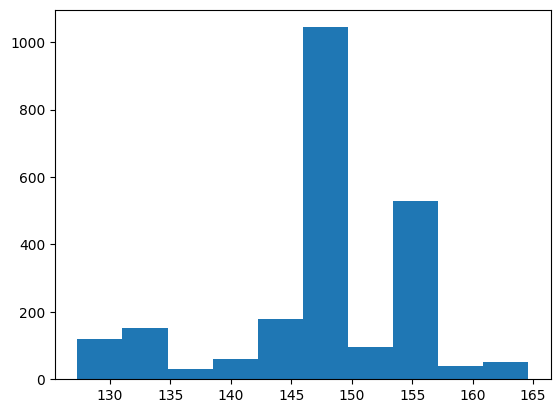

In [32]:
plt.hist(data['PartType5', 'particle_position_y'].in_units('Mpc'))

In [134]:
most_massive_bh_index = np.argmax(data['PartType5', 'BH_Mass'])

In [135]:
most_massive_bh_pos = data['PartType5', 'particle_position'][most_massive_bh_index]

In [136]:
most_massive_bh_pos.in_units('Mpc')

unyt_array([122.61841682, 151.00165441, 150.9509421 ], 'Mpc')

In [643]:
most_dyn_massive_bh_index = np.argmax(data['PartType5', 'Masses'])

In [644]:
most_dyn_massive_bh_pos = data['PartType5', 'particle_position'][most_dyn_massive_bh_index]

In [645]:
most_dyn_massive_bh_pos.in_units('Mpc')

unyt_array([143.24767923, 150.32726333, 152.98380055], 'Mpc')

# Get position of highest gas density

In [137]:
rho_max_index = np.argmax(data['gas', 'density'])

In [138]:
rho_max_pos = data['gas', 'position'][rho_max_index]

In [139]:
rho_max_pos.in_units('Mpc')

unyt_array([122.61507353, 151.00044807, 150.95179228], 'Mpc')

In [649]:
# rho_max_part_pos = data['gas', 'particle_position'][rho_max_index]

In [650]:
# rho_max_part_pos.in_units('Mpc')

unyt_array([143.24965533, 150.32574678, 152.98566176], 'Mpc')

# Centre on it - IGNORE

In [453]:
# gas_zoom_sphere = snap.sphere(gas_zoom_centre, gas_zoom_radius)

In [246]:
gas_zoom_sphere = snap.sphere(min_pot_pos, gas_zoom_radius)

In [247]:
gas_zoom_sphere

YTSphere (snap_halo_177_151): , center=[4.87558754e+26 3.81582781e+26 4.33832584e+26] cm, radius=9.91450765580987e+25 cm

In [248]:
list(gas_zoom_sphere.quantities.keys())

['WeightedAverageQuantity',
 'TotalQuantity',
 'TotalMass',
 'CenterOfMass',
 'BulkVelocity',
 'WeightedStandardDeviation',
 'AngularMomentumVector',
 'Extrema',
 'SampleAtMaxFieldValues',
 'MaxLocation',
 'SampleAtMinFieldValues',
 'MinLocation',
 'SpinParameter']

In [249]:
gas_zoom_sphere.quantities.total_mass().in_units('Msun')

unyt_array([2.89152240e+14, 6.97630841e+15], 'Msun')

In [250]:
baryon_mass, particle_mass = gas_zoom_sphere.quantities.total_quantity(
    [("gas", "mass"), ("all", "particle_mass")]
)

print(
    "Total mass in sphere is %0.3e Msun (gas = %0.3e Msun, particles = %0.3e Msun)"
    % (
        (baryon_mass + particle_mass).in_units("Msun"),
        baryon_mass.in_units("Msun"),
        particle_mass.in_units("Msun"),
    )
)

Total mass in sphere is 7.555e+15 Msun (gas = 2.892e+14 Msun, particles = 7.265e+15 Msun)


In [65]:
snap.data['gas', 'particle_position']

AttributeError: 'GizmoDataset' object has no attribute 'data'

In [ ]:
gas_zoom_data

# Calculate particle properties for getting IGrM - IGNORE

In [66]:
print(snap.field_info['gas', 'H_nuclei_density'].get_source())

def _nuclei_density(field, data):
    ftype = field.name[0]
    element = field.name[1][: field.name[1].find("_")]

    nuclei_mass_field = f"{element}_nuclei_mass_density"
    if (ftype, nuclei_mass_field) in data.ds.field_info:
        return (
            data[ftype, nuclei_mass_field]
            / ChemicalFormula(element).weight
            / data.ds.quan(1.0, "amu").in_cgs()
        )
    metal_field = f"{element}_metallicity"
    if (ftype, metal_field) in data.ds.field_info:
        return (
            data[ftype, "density"]
            * data[ftype, metal_field]
            / ChemicalFormula(element).weight
            / data.ds.quan(1.0, "amu").in_cgs()
        )

    field_data = np.zeros_like(
        data[ftype, f"{data.ds.field_info.species_names[0]}_number_density"]
    )
    for species in data.ds.field_info.species_names:
        nucleus = species
        if "_" in species:
            nucleus = species[: species.find("_")]
        # num is the number of nuclei contri

In [67]:
data['gas', 'H_nuclei_density']#.in_units('Mpc')

unyt_array([3.16280152, 2.67053787, 4.28792075, ..., 0.00925521, 0.01154859,
       0.00623445], shape=(2243885,), units='cm**(-3)')

In [68]:
igrm_zoom_sphere = gas_zoom_sphere.include_above(('gas', 'temperature'), 5e5, units='K')

In [69]:
igrm_zoom_sphere

YTCutRegion (snap_halo_3224_151): , base_object=YTSphere (snap_halo_3224_151): , center=[4.56831021e+26 4.32163911e+26 4.48607499e+26] cm, radius=5.98375241713127e+25 cm, conditionals=['obj["gas", "temperature"].in_units("K") > 500000.0']

In [70]:
igrm_zoom_sphere = igrm_zoom_sphere.include_below(('gas', 'H_nuclei_density'), 0.13, units='cm**-3')

In [71]:
igrm_zoom_sphere

YTCutRegion (snap_halo_3224_151): , base_object=YTSphere (snap_halo_3224_151): , center=[4.56831021e+26 4.32163911e+26 4.48607499e+26] cm, radius=5.98375241713127e+25 cm, conditionals=['obj["gas", "temperature"].in_units("K") > 500000.0', 'obj["gas", "H_nuclei_density"].in_units("cm**-3") < 0.13']

# Isolate IGrM

In [32]:
igrm = data.include_above(('PartType0', 'temperature'), 5e5, units='K')

In [33]:
igrm

YTCutRegion (snap_halo_252_151): , base_object=YTRegion (snap_halo_252_151): , center=[4.53776115e+26 4.53776115e+26 4.53776115e+26] cm, left_edge=[0. 0. 0.] cm, right_edge=[9.0755223e+26 9.0755223e+26 9.0755223e+26] cm, conditionals=['obj["PartType0", "temperature"].in_units("K") > 500000.0']

In [34]:
igrm = igrm.include_below(('PartType0', 'H_nuclei_density'), 0.13, units='cm**-3')

In [35]:
igrm

YTCutRegion (snap_halo_252_151): , base_object=YTRegion (snap_halo_252_151): , center=[4.53776115e+26 4.53776115e+26 4.53776115e+26] cm, left_edge=[0. 0. 0.] cm, right_edge=[9.0755223e+26 9.0755223e+26 9.0755223e+26] cm, conditionals=['obj["PartType0", "temperature"].in_units("K") > 500000.0', 'obj["PartType0", "H_nuclei_density"].in_units("cm**-3") < 0.13']

In [36]:
igrm = igrm.include_equal(('PartType0', 'DelayTime'), 0)

In [37]:
igrm

YTCutRegion (snap_halo_252_151): , base_object=YTRegion (snap_halo_252_151): , center=[4.53776115e+26 4.53776115e+26 4.53776115e+26] cm, left_edge=[0. 0. 0.] cm, right_edge=[9.0755223e+26 9.0755223e+26 9.0755223e+26] cm, conditionals=['obj["PartType0", "temperature"].in_units("K") > 500000.0', 'obj["PartType0", "H_nuclei_density"].in_units("cm**-3") < 0.13', 'obj["PartType0", "DelayTime"] == 0']

In [38]:
np.unique(data['PartType0', 'DelayTime'])

unyt_array([0.00000000e+00, 3.12572338e-05, 3.16773949e-05, ...,
       1.99996203e-01, 1.99998096e-01, 1.99999049e-01], shape=(17221,), units='(dimensionless)')

In [658]:
len(np.where(data['PartType0', 'DelayTime']<=0)[0])

67710799

In [659]:
len(np.where(data['PartType0', 'DelayTime']<0)[0])

0

In [660]:
len(np.where(data['PartType0', 'DelayTime']>0)[0])

65910

In [661]:
len(np.where(data['PartType0', 'DelayTime']>=0)[0])

67776709

In [69]:
data['temperature']

unyt_array([  25797.66879416,   23575.68193607,   28798.36668821, ...,
         13975.93537793, 1156662.93874206, 2250617.02066724],
      shape=(2243885,), units='K')

In [70]:
igrm['temperature']

unyt_array([586776.95567996, 546719.64638791, 576091.21101491, ...,
       926707.71283458, 596770.65852898, 681300.96540995],
      shape=(1242555,), units='K')

In [71]:
igrm['gas', 'particle_position_x']

unyt_array([4.68445349e+26, 4.68808158e+26, 4.68251360e+26, ...,
       4.73609605e+26, 4.73592766e+26, 4.73613859e+26], shape=(1242555,), units='cm')

In [72]:
len(igrm['temperature'])

1242555

In [73]:
len(igrm['temperature'])

1242555

In [74]:
len(data['gas', 'temperature'])

2243885

# Calculate profile with yt profiles - IGNORE

In [72]:
igrm_entropy_profile = yt.create_profile(igrm_zoom_sphere, 
                                         ('index', 'radius'), ('gas', 'entropy'),
                                         units={("index", "radius"): "kpc"},
                                         logs={("index", "radius"): False},)

AttributeError: 'tuple' object has no attribute 'sampling_type'

In [88]:
igrm_entropy_profile = igrm_zoom_sphere.profile(bin_fields=('index', 'radius'),
                                                fields=('PartType0', 'gas_entropy'),
                                                n_bins=32,
                                                weight_field='mass',
#                                              units={("index", "radius"): "kpc"},
                                                units={("PartType0", "mass"):"Msun",
                                                       ('PartType0', 'gas_entropy'):'keV*cm**2'},
#                                          logs={("index", "radius"): False},)
                                               )

AttributeError: 'tuple' object has no attribute 'sampling_type'

In [84]:
igrm_entropy_profile

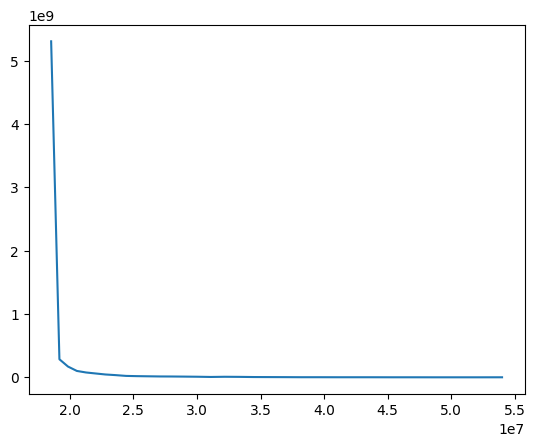

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(
    igrm_entropy_profile.x.value,
    igrm_entropy_profile["PartType0", "gas_entropy"].value,
)

# ax.set_xlabel(r"$\mathrm{r\ (kpc)}$")
# ax.set_ylabel(r"$\mathrm{v_r\ (km/s)}$")

# Calculate profile manually

In [39]:
# radial_bins = unyt.unyt_array(np.append([0], np.logspace(-1, np.log10(5), 20)), 'Mpc')
radial_bins = unyt.unyt_array(np.append([0], np.logspace(-3, np.log10(10), 50)), 'Mpc')

In [40]:
radial_bins

unyt_array([0.00000000e+00, 1.00000000e-03, 1.20679264e-03, 1.45634848e-03,
       1.75751062e-03, 2.12095089e-03, 2.55954792e-03, 3.08884360e-03,
       3.72759372e-03, 4.49843267e-03, 5.42867544e-03, 6.55128557e-03,
       7.90604321e-03, 9.54095476e-03, 1.15139540e-02, 1.38949549e-02,
       1.67683294e-02, 2.02358965e-02, 2.44205309e-02, 2.94705170e-02,
       3.55648031e-02, 4.29193426e-02, 5.17947468e-02, 6.25055193e-02,
       7.54312006e-02, 9.10298178e-02, 1.09854114e-01, 1.32571137e-01,
       1.59985872e-01, 1.93069773e-01, 2.32995181e-01, 2.81176870e-01,
       3.39322177e-01, 4.09491506e-01, 4.94171336e-01, 5.96362332e-01,
       7.19685673e-01, 8.68511374e-01, 1.04811313e+00, 1.26485522e+00,
       1.52641797e+00, 1.84206997e+00, 2.22299648e+00, 2.68269580e+00,
       3.23745754e+00, 3.90693994e+00, 4.71486636e+00, 5.68986603e+00,
       6.86648845e+00, 8.28642773e+00, 1.00000000e+01], 'Mpc')

In [234]:
gas_zoom_centre.in_units('Mpc')

unyt_array([148.25355584, 146.82190372, 138.89211282], 'Mpc')

In [41]:
min_gas_pot_pos.in_units('Mpc')

unyt_array([143.24756434, 150.32729779, 152.98390395], 'Mpc')

In [236]:
# max_gas_pot_pos.in_units('Mpc')

In [237]:
# min_pot_pos.in_units('Mpc')

In [238]:
# max_pot_pos.in_units('Mpc')

In [239]:
most_massive_bh_pos.in_units('Mpc')

unyt_array([122.61841682, 151.00165441, 150.9509421 ], 'Mpc')

In [240]:
# most_dyn_massive_bh_pos.in_units('Mpc')

In [241]:
rho_max_pos.in_units('Mpc')

unyt_array([122.61507353, 151.00044807, 150.95179228], 'Mpc')

In [42]:
igrm_pos_x = igrm['gas', 'particle_position_x']

Text(0, 0.5, 'Count')

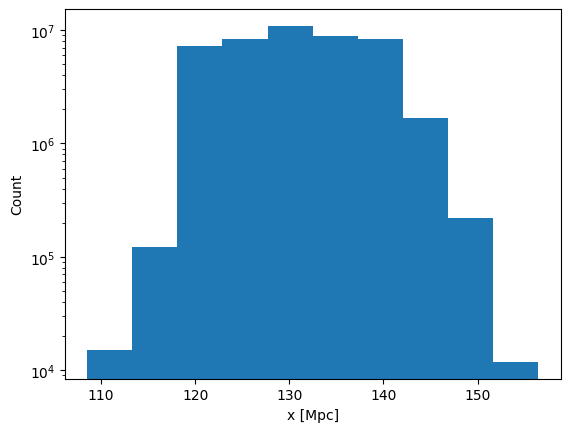

In [243]:
plt.hist(data['gas', 'particle_position_x'].in_units('Mpc'), log=True)
plt.xlabel('x [Mpc]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

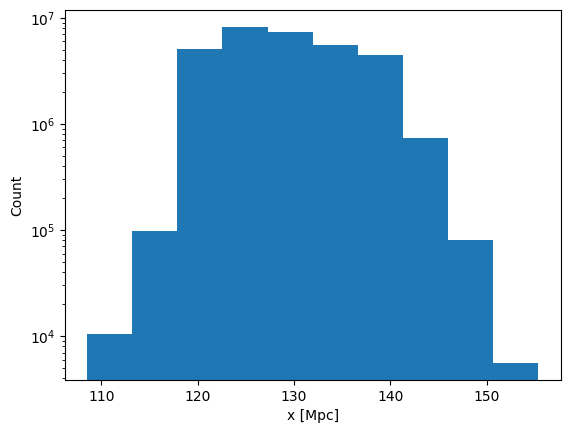

In [244]:
plt.hist(igrm_pos_x.in_units('Mpc'), log=True)
plt.xlabel('x [Mpc]')
plt.ylabel('Count')

In [43]:
igrm_pos_y = igrm['gas', 'particle_position_y']

Text(0, 0.5, 'Count')

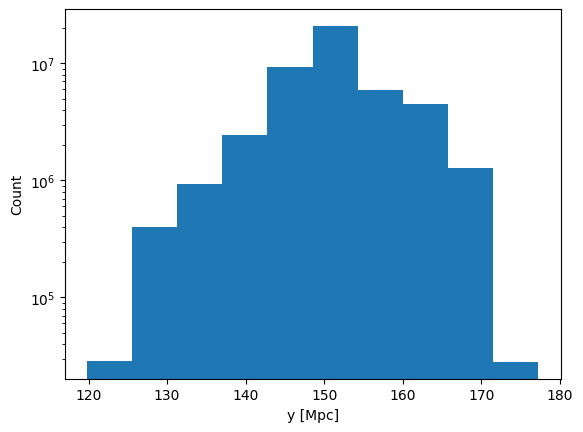

In [246]:
plt.hist(data['gas', 'particle_position_y'].in_units('Mpc'), log=True)
plt.xlabel('y [Mpc]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

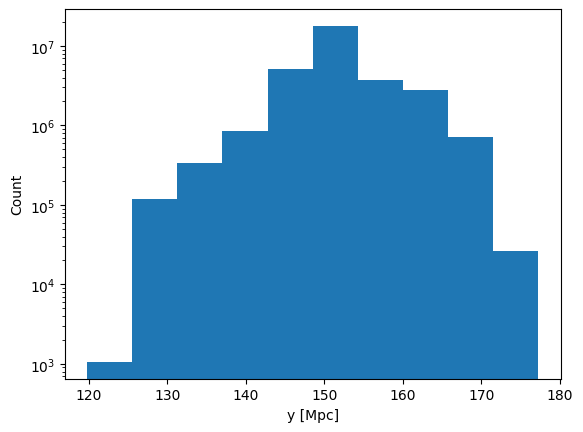

In [247]:
plt.hist(igrm_pos_y.in_units('Mpc'), log=True)
plt.xlabel('y [Mpc]')
plt.ylabel('Count')

In [44]:
igrm_pos_z = igrm['gas', 'particle_position_z']

Text(0, 0.5, 'Count')

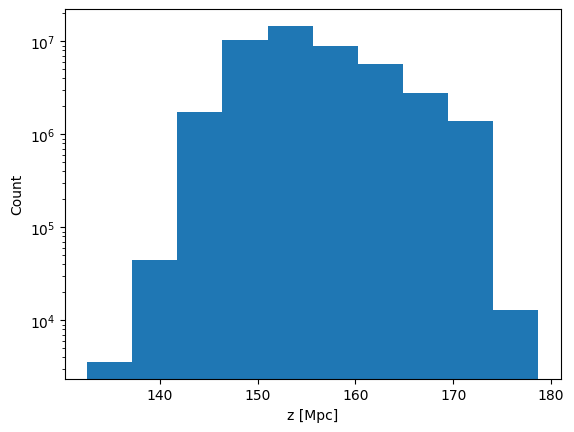

In [249]:
plt.hist(data['gas', 'particle_position_z'].in_units('Mpc'), log=True)
plt.xlabel('z [Mpc]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

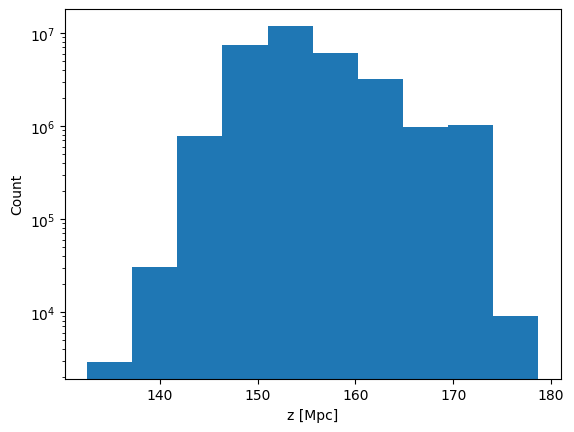

In [250]:
plt.hist(igrm_pos_z.in_units('Mpc'), log=True)
plt.xlabel('z [Mpc]')
plt.ylabel('Count')

In [251]:
# gas_pos

In [252]:
len(igrm_pos_x)

31549166

In [253]:
# igrm_zoom_radii = ((gas_pos[:,0]-gas_zoom_centre[0])**2 + 
#                   (gas_pos[:,1]-gas_zoom_centre[1])**2 + 
#                   (gas_pos[:,2]-gas_zoom_centre[2])**2)**0.5

In [254]:
igrm_zoom_radii_rel_centre = ((igrm_pos_x-gas_zoom_centre[0])**2 + 
                  (igrm_pos_y-gas_zoom_centre[1])**2 + 
                  (igrm_pos_z-gas_zoom_centre[2])**2)**0.5

In [45]:
igrm_zoom_radii_rel_min_gas_pot = ((igrm_pos_x-min_gas_pot_pos[0])**2 + 
                  (igrm_pos_y-min_gas_pot_pos[1])**2 + 
                  (igrm_pos_z-min_gas_pot_pos[2])**2)**0.5

In [256]:
# igrm_zoom_radii_rel_max_gas_pot = ((igrm_pos_x-max_gas_pot_pos[0])**2 + 
#                   (igrm_pos_y-max_gas_pot_pos[1])**2 + 
#                   (igrm_pos_z-max_gas_pot_pos[2])**2)**0.5

In [257]:
# igrm_zoom_radii_rel_min_pot = ((igrm_pos_x-min_pot_pos[0])**2 + 
#                   (igrm_pos_y-min_pot_pos[1])**2 + 
#                   (igrm_pos_z-min_pot_pos[2])**2)**0.5

In [258]:
# igrm_zoom_radii_rel_max_pot = ((igrm_pos_x-max_pot_pos[0])**2 + 
#                   (igrm_pos_y-max_pot_pos[1])**2 + 
#                   (igrm_pos_z-max_pot_pos[2])**2)**0.5

In [259]:
igrm_zoom_radii_rel_bh_mass_max = ((igrm_pos_x-most_massive_bh_pos[0])**2 + 
                  (igrm_pos_y-most_massive_bh_pos[1])**2 + 
                  (igrm_pos_z-most_massive_bh_pos[2])**2)**0.5

In [260]:
# igrm_zoom_radii_rel_bh_dyn_mass_max = ((igrm_pos_x-most_dyn_massive_bh_pos[0])**2 + 
#                   (igrm_pos_y-most_dyn_massive_bh_pos[1])**2 + 
#                   (igrm_pos_z-most_dyn_massive_bh_pos[2])**2)**0.5

In [261]:
igrm_zoom_radii_rel_rho_max = ((igrm_pos_x-rho_max_pos[0])**2 + 
                  (igrm_pos_y-rho_max_pos[1])**2 + 
                  (igrm_pos_z-rho_max_pos[2])**2)**0.5

In [262]:
# igrm_zoom_entropies = data['gas', 'entropy']

In [48]:
igrm_zoom_entropies = igrm['gas', 'entropy']

/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:1949: RuntimeWarning: divide by zero encountered in power
  out_arr = func(


In [49]:
# gas_zoom_masses = data['gas', 'mass']

In [50]:
igrm_zoom_masses = igrm['gas', 'mass']

### Change this for the centre you want!

In [46]:
igrm_zoom_radii = igrm_zoom_radii_rel_min_gas_pot

In [47]:
igrm_zoom_radii.in_units('Mpc')

unyt_array([18.02633719, 18.09641917, 18.09770843, ..., 16.73404028,
       16.73788411, 16.73879019], shape=(28443139,), units='Mpc')

In [51]:
entropy_profile_median = []
entropy_profile_mean = []
entropy_profile_mass_weighted = []
for bin_lo, bin_hi in zip(radial_bins[:-1], radial_bins[1:]):
#     print(bin_lo, bin_hi)
    radial_filter = np.logical_and(igrm_zoom_radii.in_units('Mpc').value>=bin_lo.in_units('Mpc').value,
                                   igrm_zoom_radii.in_units('Mpc').value<=bin_hi.in_units('Mpc').value)
#     print(np.where(radial_filter))
    entropies = igrm_zoom_entropies[radial_filter]
    masses = igrm_zoom_masses[radial_filter]
    print(len(entropies))
    print(len(masses))
#     print()
    
    entropy_profile_median.append(np.nanmedian(entropies))
    entropy_profile_mean.append(np.nanmean(entropies))
    if sum(masses)>0:
        K_mass = np.average(entropies, weights=masses)
    else:
        K_mass = np.nan
    
    entropy_profile_mass_weighted.append(K_mass)
    print(K_mass)
    print()

1
1
9.328035521545852 cm**2*keV

0
0
nan



/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:2040: RuntimeWarning: Mean of empty slice
  return func._implementation(*args, **kwargs)


1
1
11.711439897974444 cm**2*keV

3
3
12.161223996345191 cm**2*keV

3
3
13.496756812045122 cm**2*keV

8
8
13.196408209156347 cm**2*keV

14
14
16.510977228155443 cm**2*keV

26
26
26.575197974511976 cm**2*keV

24
24
38.35834965069246 cm**2*keV

70
70
43.08552697051227 cm**2*keV

189
189
32.18569091240249 cm**2*keV

486
486
22.015224847599345 cm**2*keV

899
899
20.068656333454193 cm**2*keV

1437
1437
20.26343332439058 cm**2*keV

2122
2122
21.16711797237552 cm**2*keV

3168
3168
22.85647276567686 cm**2*keV

4588
4588
25.081211342410874 cm**2*keV

6653
6653
26.836460313688224 cm**2*keV

9480
9480
30.00249125752817 cm**2*keV

12891
12891
34.39705382168423 cm**2*keV

17726
17726
40.23292397889425 cm**2*keV

24333
24333
47.574715585387345 cm**2*keV

32681
32681
56.673607903546966 cm**2*keV

43945
43945
66.59534874655097 cm**2*keV

57831
57831
75.40090728645444 cm**2*keV

80496
80496
87.25008082996109 cm**2*keV

110365
110365
102.0674502003755 cm**2*keV

141614
141614
116.44380866058071 cm**2*ke

In [52]:
entropy_profile_median

[unyt_quantity(9.32803552, 'cm**2*keV'),
 unyt_quantity(nan, 'cm**2*keV'),
 unyt_quantity(11.7114399, 'cm**2*keV'),
 unyt_quantity(12.42836329, 'cm**2*keV'),
 unyt_quantity(11.85089956, 'cm**2*keV'),
 unyt_quantity(13.58602959, 'cm**2*keV'),
 unyt_quantity(17.71853856, 'cm**2*keV'),
 unyt_quantity(26.16945507, 'cm**2*keV'),
 unyt_quantity(34.35824153, 'cm**2*keV'),
 unyt_quantity(32.10421783, 'cm**2*keV'),
 unyt_quantity(19.79690205, 'cm**2*keV'),
 unyt_quantity(16.00644076, 'cm**2*keV'),
 unyt_quantity(16.18298922, 'cm**2*keV'),
 unyt_quantity(18.20224726, 'cm**2*keV'),
 unyt_quantity(19.74059075, 'cm**2*keV'),
 unyt_quantity(21.63820046, 'cm**2*keV'),
 unyt_quantity(23.8225039, 'cm**2*keV'),
 unyt_quantity(25.46989716, 'cm**2*keV'),
 unyt_quantity(28.88052195, 'cm**2*keV'),
 unyt_quantity(33.81586015, 'cm**2*keV'),
 unyt_quantity(40.27426161, 'cm**2*keV'),
 unyt_quantity(48.22179798, 'cm**2*keV'),
 unyt_quantity(57.5588222, 'cm**2*keV'),
 unyt_quantity(67.65707073, 'cm**2*keV'),
 uny

In [53]:
entropy_profile_mean

[unyt_quantity(9.32803552, 'cm**2*keV'),
 unyt_quantity(nan, 'cm**2*keV'),
 unyt_quantity(11.7114399, 'cm**2*keV'),
 unyt_quantity(12.09007065, 'cm**2*keV'),
 unyt_quantity(13.54856777, 'cm**2*keV'),
 unyt_quantity(13.2819698, 'cm**2*keV'),
 unyt_quantity(17.18137834, 'cm**2*keV'),
 unyt_quantity(27.1965935, 'cm**2*keV'),
 unyt_quantity(38.75282409, 'cm**2*keV'),
 unyt_quantity(41.75253452, 'cm**2*keV'),
 unyt_quantity(32.50660136, 'cm**2*keV'),
 unyt_quantity(22.6760144, 'cm**2*keV'),
 unyt_quantity(20.76442388, 'cm**2*keV'),
 unyt_quantity(20.8903478, 'cm**2*keV'),
 unyt_quantity(21.72676538, 'cm**2*keV'),
 unyt_quantity(23.3169715, 'cm**2*keV'),
 unyt_quantity(25.57398622, 'cm**2*keV'),
 unyt_quantity(27.34820655, 'cm**2*keV'),
 unyt_quantity(30.55302834, 'cm**2*keV'),
 unyt_quantity(35.02066182, 'cm**2*keV'),
 unyt_quantity(40.89398936, 'cm**2*keV'),
 unyt_quantity(48.28567075, 'cm**2*keV'),
 unyt_quantity(57.48605472, 'cm**2*keV'),
 unyt_quantity(67.48128312, 'cm**2*keV'),
 unyt_q

In [54]:
entropy_profile_mass_weighted

[unyt_quantity(9.32803552, 'cm**2*keV'),
 nan,
 unyt_quantity(11.7114399, 'cm**2*keV'),
 unyt_quantity(12.161224, 'cm**2*keV'),
 unyt_quantity(13.49675681, 'cm**2*keV'),
 unyt_quantity(13.19640821, 'cm**2*keV'),
 unyt_quantity(16.51097723, 'cm**2*keV'),
 unyt_quantity(26.57519797, 'cm**2*keV'),
 unyt_quantity(38.35834965, 'cm**2*keV'),
 unyt_quantity(43.08552697, 'cm**2*keV'),
 unyt_quantity(32.18569091, 'cm**2*keV'),
 unyt_quantity(22.01522485, 'cm**2*keV'),
 unyt_quantity(20.06865633, 'cm**2*keV'),
 unyt_quantity(20.26343332, 'cm**2*keV'),
 unyt_quantity(21.16711797, 'cm**2*keV'),
 unyt_quantity(22.85647277, 'cm**2*keV'),
 unyt_quantity(25.08121134, 'cm**2*keV'),
 unyt_quantity(26.83646031, 'cm**2*keV'),
 unyt_quantity(30.00249126, 'cm**2*keV'),
 unyt_quantity(34.39705382, 'cm**2*keV'),
 unyt_quantity(40.23292398, 'cm**2*keV'),
 unyt_quantity(47.57471559, 'cm**2*keV'),
 unyt_quantity(56.6736079, 'cm**2*keV'),
 unyt_quantity(66.59534875, 'cm**2*keV'),
 unyt_quantity(75.40090729, 'cm**

In [55]:
radial_bin_centres = (radial_bins[:-1] + radial_bins[1:])/2.

In [56]:
radial_bin_centres_logged = np.log10(radial_bin_centres)

In [57]:
log_radial_bin_centres = (np.log10(radial_bins[:-1]) + np.log10(radial_bins[1:]))/2.

/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:1824: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


In [58]:
log_radial_bin_centres_unlogged = 10**log_radial_bin_centres

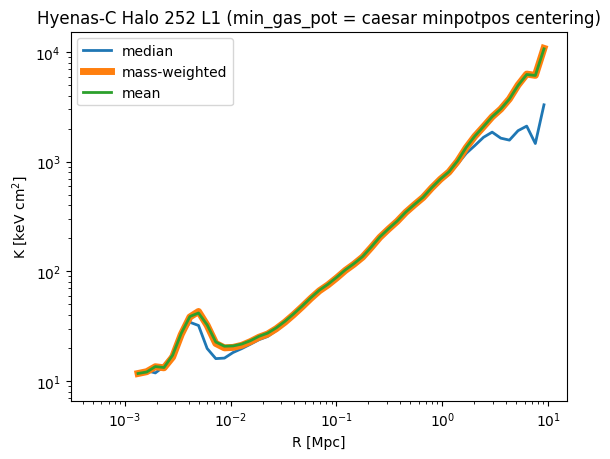

In [61]:
plt.plot(radial_bin_centres, entropy_profile_median, label='median', lw=2)
plt.plot(radial_bin_centres, entropy_profile_mass_weighted, label='mass-weighted', lw=5)
plt.plot(radial_bin_centres, entropy_profile_mean, label='mean', lw=2)
plt.title('Hyenas-C Halo 252 L1 (min_gas_pot = caesar minpotpos centering)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R [Mpc]')
plt.ylabel(r'K [keV $\mathrm{cm^2}$]')
plt.legend()